In [3]:
import gensim
import numpy as np

In [ ]:
# Load models
model_democrats_before_2016 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_before_2016.model")
model_democrats_2017_2020 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_2017_2020.model")
model_democrats_2021_2024 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_2021_2024.model")
model_republican_before_2016 = gensim.models.Word2Vec.load("reddit_word2vec_republican_before_2016.model")
model_republican_2017_2020 = gensim.models.Word2Vec.load("reddit_word2vec_republican_2017_2020.model")
model_republican_2021_2024 = gensim.models.Word2Vec.load("reddit_word2vec_republican_2021_2024.model")
model_democrats_all_periods = gensim.models.Word2Vec.load("reddit_word2vec_democrats_all_periods.model")
model_republican_all_periods = gensim.models.Word2Vec.load("reddit_word2vec_republican_all_periods.model")
model_democrats_with_stopwords_before_2016 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_with_stopwords_before_2016.model")
model_democrats_with_stopwords_2017_2020 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_with_stopwords_2017_2020.model")
model_democrats_with_stopwords_2021_2024 = gensim.models.Word2Vec.load("reddit_word2vec_democrats_with_stopwords_2021_2024.model")
model_republican_with_stopwords_before_2016 = gensim.models.Word2Vec.load("reddit_word2vec_republican_with_stopwords_before_2016.model")
model_republican_with_stopwords_2017_2020 = gensim.models.Word2Vec.load("reddit_word2vec_republican_with_stopwords_2017_2020.model")
model_republican_with_stopwords_2021_2024 = gensim.models.Word2Vec.load("reddit_word2vec_republican_with_stopwords_2021_2024.model")

In [4]:
def compare_word_similarities(word, models_dict, topn=5):
    
    results = {}
    
    print(f"Comparing similar words to '{word}' across time periods:")
    print("-" * 50)
    
    for period, model in models_dict.items():
        if word in model.wv:
            similars = model.wv.most_similar(word, topn=topn)
            results[period] = similars
            print(f"\n{period}:")
            for similar_word, similarity in similars:
                print(f"  {similar_word}: {similarity:.4f}")
        else:
            print(f"\n{period}: '{word}' not found in vocabulary")
    
    return results

# Compare key political terms
democrats_models = {
    "democrats_before_2016": model_democrats_before_2016,
    "democrats_2017_2020": model_democrats_2017_2020,
    "democrats_2021_2024": model_democrats_2021_2024,
}

republican_models = {
    "republican_before_2016": model_republican_before_2016,
    "republican_2017_2020": model_republican_2017_2020,
    "republican_2021_2024": model_republican_2021_2024,
}

compare_word_similarities("president", democrats_models, topn=10)
compare_word_similarities("democracy", democrats_models, topn=10)
compare_word_similarities("policy", democrats_models, topn=10)

compare_word_similarities("president", republican_models, topn=10)
compare_word_similarities("democracy", republican_models, topn=10)
compare_word_similarities("policy", republican_models, topn=10)

Comparing similar words to 'president' across time periods:
--------------------------------------------------

democrats_before_2016:
  presidency: 0.7489
  president_obama: 0.7141
  bill_clinton: 0.7028
  potus: 0.7006
  appoint: 0.6978
  administration: 0.6847
  presidential_candidate: 0.6753
  congress: 0.6507
  elect_president: 0.6451
  vice_president: 0.6443

democrats_2017_2020:
  potus: 0.7549
  presidency: 0.6414
  presidential: 0.5783
  former_president: 0.5437
  vice_president: 0.5376
  administration: 0.5170
  second_term: 0.5055
  leader: 0.4941
  cabinet: 0.4911
  presidential_candidate: 0.4874

democrats_2021_2024:
  potus: 0.8070
  vice_president: 0.5991
  presidency: 0.5830
  second_term: 0.5719
  vp: 0.5547
  presidential_candidate: 0.5379
  presidential: 0.5287
  pres: 0.5245
  administration: 0.4985
  commander_chief: 0.4786
Comparing similar words to 'democracy' across time periods:
--------------------------------------------------

democrats_before_2016:
  politi

{'republican_before_2016': [('economic_policy', 0.6637023091316223),
  ('fiscal_policy', 0.565116822719574),
  ('stance', 0.5150612592697144),
  ('foreign_policy', 0.4956953823566437),
  ('immigration_policy', 0.4907269775867462),
  ('standpoint', 0.46686652302742004),
  ('policy_proposal', 0.46572354435920715),
  ('interventionist_foreign', 0.4654267132282257),
  ('proposal', 0.4573465585708618),
  ('legislation', 0.4544987678527832)],
 'republican_2017_2020': [('immigration_policy', 0.5977802276611328),
  ('status_quo', 0.5836631655693054),
  ('economic_policy', 0.5836541652679443),
  ('legislation', 0.5574622750282288),
  ('foreign_policy', 0.5527686476707458),
  ('initiative', 0.5477924346923828),
  ('implement', 0.536376953125),
  ('agenda', 0.5259261131286621),
  ('pro_growth', 0.524163007736206),
  ('economic', 0.5125830769538879)],
 'republican_2021_2024': [('economic_policy', 0.6864711046218872),
  ('immigration_policy', 0.6258879899978638),
  ('foreign_policy', 0.615931630134

In [3]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

def compare_party_embeddings_by_period(dem_model, rep_model, time_period, output_file=None):
    """Compare two word2vec models globally by aligning their vector spaces"""
    # Find common vocabulary
    vocab_dem = set(dem_model.wv.index_to_key)
    vocab_rep = set(rep_model.wv.index_to_key)
    common_vocab = list(vocab_dem.intersection(vocab_rep))
    
    # Extract embeddings for common words
    vectors_dem = np.array([dem_model.wv[word] for word in common_vocab])
    vectors_rep = np.array([rep_model.wv[word] for word in common_vocab])
    
    # Compute the best rotational alignment (orthogonal Procrustes)
    m = vectors_dem.T @ vectors_rep
    u, _, vt = np.linalg.svd(m)
    rotation = u @ vt
    
    # Apply rotation to align model2's space with model1's space
    vectors_rep_aligned = vectors_rep @ rotation
    
    # Calculate word by word similarities
    similarities = []
    for i, word in enumerate(common_vocab):
        sim = cosine_similarity(vectors_dem[i].reshape(1, -1), 
                                vectors_rep_aligned[i].reshape(1, -1))[0][0]
        similarities.append((word, sim))
    
    # Create DataFrame
    df = pd.DataFrame(similarities, columns=['word', 'similarity'])
    
    # Add context data - most similar words in each model
    dem_context = []
    rep_context = []
    
    for word in df['word']:
        try:
            dem_similar = [w for w, _ in dem_model.wv.most_similar(word, topn=10)]
            dem_context.append(", ".join(dem_similar))
        except:
            dem_context.append("")
        
        try:
            rep_similar = [w for w, _ in rep_model.wv.most_similar(word, topn=10)]
            rep_context.append(", ".join(rep_similar))
        except:
            rep_context.append("")
    
    df['dem_context'] = dem_context
    df['rep_context'] = rep_context
    df['time_period'] = time_period
    
    # Sort by similarity (most different words first)
    df = df.sort_values('similarity')
    
    # Save to file if requested
    if output_file:
        df.to_csv(output_file, index=False)
        print(f"Results saved to {output_file}")
    
    return df


In [4]:
# Before 2016
df_before_2016 = compare_party_embeddings_by_period(
    model_democrats_before_2016, 
    model_republican_before_2016,
    "before_2016",
    output_file="party_comparison_before_2016_top_10.csv"
)

# 2017-2020
df_2017_2020 = compare_party_embeddings_by_period(
    model_democrats_2017_2020, 
    model_republican_2017_2020,
    "2017_2020",
    output_file="party_comparison_2017_2020_top_10.csv"
)

# 2021-2024
df_2021_2024 = compare_party_embeddings_by_period(
    model_democrats_2021_2024, 
    model_republican_2021_2024,
    "2021_2024",
    output_file="party_comparison_2021_2024_top_10.csv"
)

Results saved to party_comparison_before_2016_top_10.csv
Results saved to party_comparison_2017_2020_top_10.csv
Results saved to party_comparison_2021_2024_top_10.csv


In [8]:
# Before 2016
df_before_2016_with_stopwords = compare_party_embeddings_by_period(
    model_democrats_with_stopwords_before_2016,
    model_republican_with_stopwords_before_2016,
    "before_2016",
    output_file="party_comparison_with_stopwords_before_2016_top_10.csv"
)

# 2017-2020
df_2017_2020_with_stopwords = compare_party_embeddings_by_period(
    model_democrats_with_stopwords_2017_2020, 
    model_republican_with_stopwords_2017_2020,
    "2017_2020",
    output_file="party_comparison_with_stopwords_2017_2020_top_10.csv"
)  
# 2021-2024
df_2021_2024_with_stopwords = compare_party_embeddings_by_period(
    model_democrats_with_stopwords_2021_2024, 
    model_republican_with_stopwords_2021_2024,
    "2021_2024",
    output_file="party_comparison_with_stopwords_2021_2024_top_10.csv"
)

Results saved to party_comparison_with_stopwords_before_2016_top_10.csv
Results saved to party_comparison_with_stopwords_2017_2020_top_10.csv
Results saved to party_comparison_with_stopwords_2021_2024_top_10.csv


In [12]:
df_all_period = compare_party_embeddings_by_period(
    model_democrats_all_periods, 
    model_republican_all_periods,
    "all_periods",
    output_file="party_comparison_all_periods_all_words.csv"
)

Results saved to party_comparison_all_periods_all_words.csv


In [ ]:
# find most different frequency words

def find_most_different_frequency_words(model1, model2, topn=10, min_frequency=5, output_file=None):
    """Find words with the most different frequencies in two models and save detailed analysis"""
    import pandas as pd
    
    vocab1 = set(model1.wv.index_to_key)
    vocab2 = set(model2.wv.index_to_key)
    common_vocab = list(vocab1.intersection(vocab2))
    
    freq1 = {word: model1.wv.get_vecattr(word, 'count') for word in common_vocab}
    freq2 = {word: model2.wv.get_vecattr(word, 'count') for word in common_vocab}
    
    # Calculate differences and ratios
    results = []
    for word in common_vocab:
        f1 = freq1[word]
        f2 = freq2[word]
        
        # Skip words that are too infrequent in both models
        if f1 < min_frequency and f2 < min_frequency:
            continue
        
        difference = abs(f1 - f2)
        
        # Calculate ratio (avoid division by zero)
        if f2 == 0:
            ratio = float('inf') if f1 > 0 else 1.0
        else:
            ratio = f1 / f2
            
        # Determine which model has higher frequency (dominant model)
        dominant_model = "democrats" if f1 > f2 else "republican"
        
        results.append({
            'word': word,
            'frequency_democrats': f1,
            'frequency_republican': f2,
            'difference': difference,
            'ratio_democrats_to_republican': ratio,
            'dominant_model': dominant_model
        })
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Sort by difference (largest differences first)
    df = df.sort_values('difference', ascending=False)
    
    # Limit to topn if specified
    if topn:
        df = df.head(topn)
    
    # Save to CSV if output file specified
    if output_file:
        df.to_csv(output_file, index=False)
        print(f"Frequency analysis saved to {output_file}")
    
    return df

# Use the function for different time periods
print("=== Before 2016 ===")
freq_diff_before_2016 = find_most_different_frequency_words(
    model_democrats_before_2016, 
    model_republican_before_2016, 
    topn=50,
    min_frequency=5,
    output_file="frequency_differences_before_2016.csv"
)
print(freq_diff_before_2016.head(10))

print("\n=== 2017-2020 ===")
freq_diff_2017_2020 = find_most_different_frequency_words(
    model_democrats_2017_2020, 
    model_republican_2017_2020, 
    topn=50,
    min_frequency=5,
    output_file="frequency_differences_2017_2020.csv"
)
print(freq_diff_2017_2020.head(10))

print("\n=== 2021-2024 ===")
freq_diff_2021_2024 = find_most_different_frequency_words(
    model_democrats_2021_2024, 
    model_republican_2021_2024, 
    topn=50,
    min_frequency=5,
    output_file="frequency_differences_2021_2024.csv"
)
print(freq_diff_2021_2024.head(10))

# # Also compare all periods models
# print("\n=== All Periods ===")
# freq_diff_all_periods = find_most_different_frequency_words(
#     model_democrats_all_periods, 
#     model_republican_all_periods, 
#     topn=100,
#     output_file="frequency_differences_all_periods.csv"
# )
# print(freq_diff_all_periods.head(10))

=== Before 2016 ===
Frequency analysis saved to frequency_differences_before_2016.csv
         word  frequency_democrats  frequency_republican  difference  \
4214   people                23521                 59520       35999   
11475   would                18754                 52068       33314   
5171      say                20129                 51953       31824   
10180      gt                17763                 47686       29923   
10418   think                16302                 44655       28353   
8770      get                19546                 46143       26597   
14432    like                15647                 40420       24773   
13619      go                16056                 40573       24517   
17677    make                14927                 38545       23618   
18158     one                14838                 35546       20708   

       ratio_democrats_to_republican dominant_model  
4214                        0.395178     republican  
11475        

In [ ]:
def find_highest_ratio_differences(model1, model2, topn=50, min_frequency=5, output_file=None):
    """Find words with the highest ratio differences between two models"""
    import pandas as pd
    
    vocab1 = set(model1.wv.index_to_key)
    vocab2 = set(model2.wv.index_to_key)
    common_vocab = list(vocab1.intersection(vocab2))
    
    freq1 = {word: model1.wv.get_vecattr(word, 'count') for word in common_vocab}
    freq2 = {word: model2.wv.get_vecattr(word, 'count') for word in common_vocab}
    
    # Calculate ratios for words that meet minimum frequency threshold
    results = []
    for word in common_vocab:
        f1 = freq1[word]
        f2 = freq2[word]
        
        # Skip words that are too infrequent in both models
        if f1 < min_frequency and f2 < min_frequency:
            continue
            
        # Calculate ratios
        if f2 == 0:
            ratio_1_to_2 = float('inf') if f1 > 0 else 1.0
            ratio_2_to_1 = 0
        elif f1 == 0:
            ratio_1_to_2 = 0
            ratio_2_to_1 = float('inf')
        else:
            ratio_1_to_2 = f1 / f2
            ratio_2_to_1 = f2 / f1
            
        # Use the maximum ratio as the measure of difference
        max_ratio = max(ratio_1_to_2, ratio_2_to_1) if ratio_1_to_2 != float('inf') and ratio_2_to_1 != float('inf') else float('inf')
        
        # Determine which model has higher frequency
        dominant_model = "democrats" if f1 > f2 else "republican"
        
        results.append({
            'word': word,
            'frequency_democrats': f1,
            'frequency_republican': f2,
            'difference': abs(f1 - f2),
            'ratio_democrats_to_republican': ratio_1_to_2,
            'ratio_republican_to_democrats': ratio_2_to_1,
            'max_ratio': max_ratio,
            'dominant_model': dominant_model
        })
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Sort by max_ratio (highest ratio differences first)
    # Handle infinity values by sorting them to the top
    df['sort_key'] = df['max_ratio'].replace(float('inf'), float('1e10'))
    df = df.sort_values('sort_key', ascending=False).drop('sort_key', axis=1)
    
    # Limit to topn if specified
    if topn:
        df = df.head(topn)
    
    # Save to CSV if output file specified
    if output_file:
        # Replace inf with a readable string for CSV
        df_export = df.copy()
        df_export['ratio_democrats_to_republican'] = df_export['ratio_democrats_to_republican'].replace(float('inf'), 'inf')
        df_export['ratio_republican_to_democrats'] = df_export['ratio_republican_to_democrats'].replace(float('inf'), 'inf')
        df_export['max_ratio'] = df_export['max_ratio'].replace(float('inf'), 'inf')
        df_export.to_csv(output_file, index=False)
        print(f"Ratio analysis saved to {output_file}")
    
    return df

# Use the function for different time periods
print("=== Highest Ratio Differences - Before 2016 ===")
ratio_diff_before_2016 = find_highest_ratio_differences(
    model_democrats_before_2016, 
    model_republican_before_2016, 
    topn=50,
    min_frequency=5,
    output_file="ratio_differences_before_2016.csv"
)
print(ratio_diff_before_2016.head(10))

print("\n=== Highest Ratio Differences - 2017-2020 ===")
ratio_diff_2017_2020 = find_highest_ratio_differences(
    model_democrats_2017_2020, 
    model_republican_2017_2020, 
    topn=50,
    min_frequency=5,
    output_file="ratio_differences_2017_2020.csv"
)
print(ratio_diff_2017_2020.head(10))

print("\n=== Highest Ratio Differences - 2021-2024 ===")
ratio_diff_2021_2024 = find_highest_ratio_differences(
    model_democrats_2021_2024, 
    model_republican_2021_2024, 
    topn=50,
    min_frequency=5,
    output_file="ratio_differences_2021_2024.csv"
)
print(ratio_diff_2021_2024.head(10))

# # Also compare all periods models
# print("\n=== Highest Ratio Differences - All Periods ===")
# ratio_diff_all_periods = find_highest_ratio_differences(
#     model_democrats_all_periods, 
#     model_republican_all_periods, 
#     topn=100,
#     min_frequency=10,
#     output_file="ratio_differences_all_periods.csv"
# )
# print(ratio_diff_all_periods.head(10))

=== Highest Ratio Differences - Before 2016 ===
Ratio analysis saved to ratio_differences_before_2016.csv
                word  frequency_democrats  frequency_republican  difference  \
5787          kasich                  126                  4749        4623   
15478  illegal_alien                   12                   429         417   
6195      cruz_rubio                    9                   288         279   
4552      nevertrump                   10                   316         306   
2365    rule_sidebar                  468                    15         453   
8343   secure_border                    8                   242         234   
9128          donnie                    5                   142         137   
15966    bernie_bros                  255                     9         246   
13880        amnesty                   41                  1124        1083   
3757     open_border                   12                   312         300   

       ratio_democrats_t

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
df_before_2016 = pd.read_csv("party_comparison_before_2016_top_10.csv")
df_2017_2020 = pd.read_csv("party_comparison_2017_2020_top_10.csv") 
df_2021_2024 = pd.read_csv("party_comparison_2021_2024_top_10.csv")


print("Data loaded successfully!")
print(f"Similarity data shape: {df_before_2016.shape}, {df_2017_2020.shape}, {df_2021_2024.shape}")

Data loaded successfully!
Similarity data shape: (19221, 5), (26785, 5), (33730, 5)


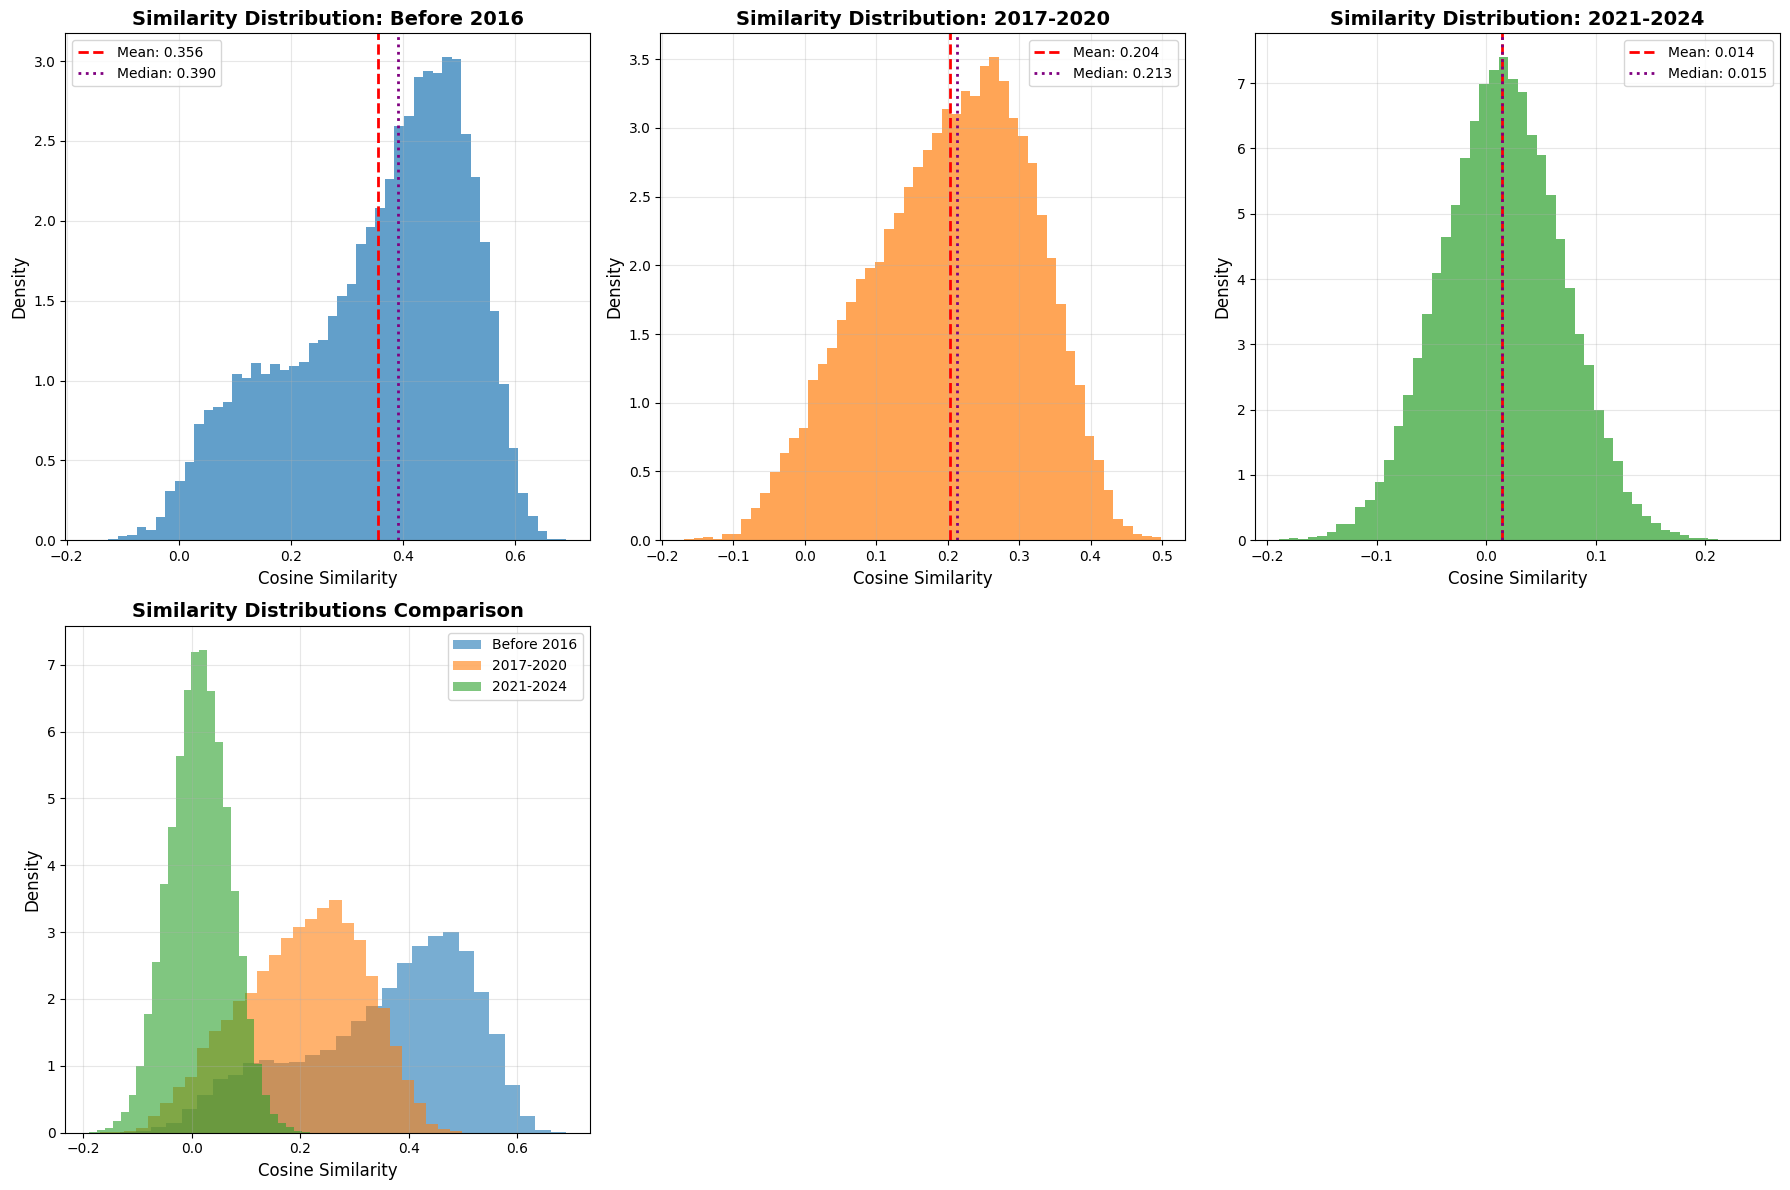


COSINE SIMILARITY DISTRIBUTION ANALYSIS

Before 2016 Statistics:
  Mean similarity: 0.3555
  Median similarity: 0.3902
  Std similarity: 0.1560
  Min similarity: -0.1599
  Max similarity: 0.6903
  Words with similarity < 0.0: 274/19221 (1.4%)
  Words with similarity < -0.1: 8/19221 (0.0%)

2017-2020 Statistics:
  Mean similarity: 0.2035
  Median similarity: 0.2133
  Std similarity: 0.1123
  Min similarity: -0.1688
  Max similarity: 0.4988
  Words with similarity < 0.0: 1161/26785 (4.3%)
  Words with similarity < -0.1: 40/26785 (0.1%)

2021-2024 Statistics:
  Mean similarity: 0.0143
  Median similarity: 0.0145
  Std similarity: 0.0549
  Min similarity: -0.1891
  Max similarity: 0.2464
  Words with similarity < 0.0: 13330/33730 (39.5%)
  Words with similarity < -0.1: 620/33730 (1.8%)


In [13]:
def analyze_similarity_distributions():
    """Analyze how cosine similarity distributions change over time"""
    
    # Prepare data
    dataframes = [df_before_2016, df_2017_2020, df_2021_2024]
    period_names = ['Before 2016', '2017-2020', '2021-2024']
    
    # Create the plot
    plt.figure(figsize=(18, 12))
    
    # Main distribution plots
    for i, (df, period) in enumerate(zip(dataframes, period_names)):
        plt.subplot(2, 3, i+1)
        
        # Create histogram
        plt.hist(df['similarity'], bins=50, alpha=0.7, density=True, 
                color=['#1f77b4', '#ff7f0e', '#2ca02c'][i])
        
        # Add statistics
        mean_sim = df['similarity'].mean()
        std_sim = df['similarity'].std()
        median_sim = df['similarity'].median()
        
        plt.axvline(mean_sim, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {mean_sim:.3f}')
        plt.axvline(median_sim, color='purple', linestyle=':', linewidth=2,
                   label=f'Median: {median_sim:.3f}')
        
        plt.title(f'Similarity Distribution: {period}', fontsize=14, fontweight='bold')
        plt.xlabel('Cosine Similarity', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    # Combined comparison plot
    plt.subplot(2, 3, 4)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
    for i, (df, period, color) in enumerate(zip(dataframes, period_names, colors)):
        plt.hist(df['similarity'], bins=30, alpha=0.6, density=True, 
                label=period, color=color)
    
    plt.title('Similarity Distributions Comparison', fontsize=14, fontweight='bold')
    plt.xlabel('Cosine Similarity', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print("COSINE SIMILARITY DISTRIBUTION ANALYSIS")
    
    for df, period in zip(dataframes, period_names):
        print(f"\n{period} Statistics:")
        print(f"  Mean similarity: {df['similarity'].mean():.4f}")
        print(f"  Median similarity: {df['similarity'].median():.4f}")
        print(f"  Std similarity: {df['similarity'].std():.4f}")
        print(f"  Min similarity: {df['similarity'].min():.4f}")
        print(f"  Max similarity: {df['similarity'].max():.4f}")
        print(f"  Words with similarity < 0.0: {(df['similarity'] < 0.0).sum()}/{len(df)} ({(df['similarity'] < 0.0).mean()*100:.1f}%)")
        print(f"  Words with similarity < -0.1: {(df['similarity'] < -0.1).sum()}/{len(df)} ({(df['similarity'] < -0.1).mean()*100:.1f}%)")


# Run the analysis
similarity_stats = analyze_similarity_distributions()